In [1]:
import pandas as pd
import snownlp
from snownlp import SnowNLP
from snownlp import sentiment
import numpy as np
import csv
from pandas import DataFrame

In [2]:
# 此前尝试中，分析的情感比预期正面，因此先对snownlp进行训练
# 训练材料来自网络的30000条网络文本
pd_all = pd.read_csv('sentiment_XS_30k.csv')
pd_all.sample(20)

,labels,text
13383,positive,明白 拉 马上 就 下载 有心 去
26600,negative,就 还 哀家
3357,negative,嗯 很 惊讶
3539,positive,喜欢 上 啦 宝贝
28918,negative,走 他们 无聊 是不是
29149,negative,很 难过 好 把
9100,negative,不 好看 不要 笑 哦
7247,positive,绿色 版本 还是 女
21065,positive,命令 欢迎 骂
6782,positive,说 蛮 清楚


In [3]:
pos = pd_all.loc[pd_all['labels'] == 'positive']
neg = pd_all.loc[pd_all['labels'] == 'negative']
pos = pos[['text']]
neg = neg[['text']]

In [4]:
# 转写成txt以加入训练样本
import json
pos.to_csv('pos.txt',sep='\t',index=False,encoding='utf-8')
neg.to_csv('neg.txt',sep='\t',index=False,encoding='utf-8')

In [5]:
# 情感分析训练库
from snownlp import sentiment
sentiment.train('neg.txt', 'pos.txt')
sentiment.save('sentiment.marshal')

In [6]:
df = pd.read_csv('2141comments_xingxing.csv', header=0,encoding='utf-8',dtype=str)

In [7]:
# 观察数据发现有空值行，先删除
df.dropna(axis=0, how='all', inplace=True)
# 将评论列转写成txt，方便后续分析
df1 = df[["comment_info"]]
df1

,comment_info
0,要是有个自杀树林就好了，每个人自己准备绳子，选择一棵喜欢的树，在阳光灿烂的下午，慢慢挣扎的死...
2,其实挺羡慕意外死亡的
4,看了一下任航的评论和转发，好多人对他说，下辈子做个无忧无虑的人。对抑郁症患者说下辈子，真的是...
6,容我择日疯，来年撞日死
8,饭，今天乔任梁走了呢，希望你们在同一个世界，那里没有病痛，有欢乐。会过的很开心
...,...
4272,从今天开始走上和大多数人不一样的道路 碌碌无为的人生 虽然也不会太久了 唉很烦每天都来你微博...
4274,唉 怪我管的多了吗 我是你的亲人啊 能不想你好吗 你一点都不知道我多想你好好的 一切都好好的...
4276,好多人劝我回去 我不想回去 就算我回去了又怎样 他们只要达到他们的目的――我回去 然后剩下都...
4278,饭 玻璃碴子也许比美工刀顺手


In [8]:
# 观察数据发现有空值行，先删除
df1.dropna(axis=0, how='all', inplace=True)
df1

<ipython-input-8-cec7a73eb5d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis=0, how='all', inplace=True)


,comment_info
0,要是有个自杀树林就好了，每个人自己准备绳子，选择一棵喜欢的树，在阳光灿烂的下午，慢慢挣扎的死...
2,其实挺羡慕意外死亡的
4,看了一下任航的评论和转发，好多人对他说，下辈子做个无忧无虑的人。对抑郁症患者说下辈子，真的是...
6,容我择日疯，来年撞日死
8,饭，今天乔任梁走了呢，希望你们在同一个世界，那里没有病痛，有欢乐。会过的很开心
...,...
4272,从今天开始走上和大多数人不一样的道路 碌碌无为的人生 虽然也不会太久了 唉很烦每天都来你微博...
4274,唉 怪我管的多了吗 我是你的亲人啊 能不想你好吗 你一点都不知道我多想你好好的 一切都好好的...
4276,好多人劝我回去 我不想回去 就算我回去了又怎样 他们只要达到他们的目的――我回去 然后剩下都...
4278,饭 玻璃碴子也许比美工刀顺手


In [9]:
# 测试分析第一条
text = df1.comment_info.loc[0]
s = SnowNLP(text)
s.sentiments

0.8379903374930406

In [10]:
# 进行批量处理
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments
df1["sentiment"] = df1.comment_info.apply(get_sentiment_cn)
df1.head()

<ipython-input-10-e523397bcda0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["sentiment"] = df1.comment_info.apply(get_sentiment_cn)


,comment_info,sentiment
0,要是有个自杀树林就好了，每个人自己准备绳子，选择一棵喜欢的树，在阳光灿烂的下午，慢慢挣扎的死...,0.837990
2,其实挺羡慕意外死亡的,0.743765
4,看了一下任航的评论和转发，好多人对他说，下辈子做个无忧无虑的人。对抑郁症患者说下辈子，真的是...,0.000029
6,容我择日疯，来年撞日死,0.042066
8,饭，今天乔任梁走了呢，希望你们在同一个世界，那里没有病痛，有欢乐。会过的很开心,0.840104


In [11]:
df1.sentiment.mean()

0.313619673071847

In [12]:
# 画图
import seaborn as sns
import matplotlib.pyplot as plt

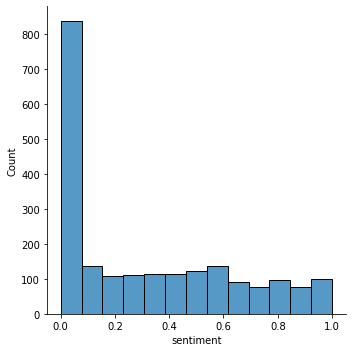

In [13]:
# 句子的直方图
sns.displot(df1['sentiment'])
plt.savefig('sentiment.png')
plt.show()